<a href="https://colab.research.google.com/github/audreyvm/NLP-Projects/blob/main/Audrey_Mash_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Data & Functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(1, '/content/drive/MyDrive/Colab/Final Assignment')

Importing cleaning functions from my file

In [ ]:
from cleaning_functions import *

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
truth universally acknowledge single man possession good fortune must want wife


Some other functions I'm using in the notebook

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string


Reading in (reduced) train & test data as dataframe.
With the reduced data my session never crashes but with the full data it continued to crash when vectorizing so I've stuck with the small training set and got (surprisingly) good results.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab/Final Assignment/train_reduced.csv',delimiter=',')
data.head()

,id,label,tweet
0,12234,0,@user 78 days until we are here! countdown is...
1,30755,1,like msian opposition and their claim that ban...
2,22175,0,@user so fkn excited!!!!!!!!!
3,5052,0,solidarity with orlando ð #solidaritywithor...
4,21884,0,finalizing the qubis design. a beautiful conce...


In [ ]:
data.shape

(10000, 3)

In [ ]:
data['cleaned_tweet']=data['tweet'].apply(lambda row : clean_text(row, lemmatization, 'english'))
data.head()

,id,label,tweet,cleaned_tweet
0,12234,0,@user 78 days until we are here! countdown is...,user 78 day countdown user excite ðð¾ð¬...
1,30755,1,like msian opposition and their claim that ban...,like msian opposition claim bangladeshis vote ...
2,22175,0,@user so fkn excited!!!!!!!!!,user fkn excite
3,5052,0,solidarity with orlando ð #solidaritywithor...,solidarity orlando ð solidaritywithorlando ...
4,21884,0,finalizing the qubis design. a beautiful conce...,finalizing qubis design beautiful concept fina...


In [ ]:
data["label"].value_counts()

0    9307
1     693
Name: label, dtype: int64

Very unbalanced label counts!

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/Colab/Final Assignment/test.csv',delimiter=',')
data_test.head()

,id,label,tweet
0,6054,0,@user a happy marriage is the union of two go...
1,6946,0,hey @user me and @user will see you @user in a...
2,440,0,we'll back going to tacloban now! see ya later...
3,9025,0,my #boyfriend hasn't come back home yet :( #cr...
4,16995,0,i am thankful for clothes. #thankful #positive...


In [ ]:
data_test['cleaned_tweet']=data_test['tweet'].apply(lambda row : clean_text(row, lemmatization, 'english'))
data_test.head()

,id,label,tweet,cleaned_tweet
0,6054,0,@user a happy marriage is the union of two go...,user happy marriage union two good forgiver â...
1,6946,0,hey @user me and @user will see you @user in a...,hey user user see user august somethingtolookf...
2,440,0,we'll back going to tacloban now! see ya later...,will back go tacloban see ya later ó¾µâ¤ gre...
3,9025,0,my #boyfriend hasn't come back home yet :( #cr...,boyfriend n't come back home yet crazyboyfrien...
4,16995,0,i am thankful for clothes. #thankful #positive...,thankful clothe thankful positive


# Visualizing the data

Wordclouds of the data

In [ ]:
!pip3 install wordcloud
from wordcloud import WordCloud


In [ ]:
all_tweets= data['cleaned_tweet'].str.cat()
all_tweets

"user 78 day countdown user excite ð\x9f\x98\x89ð\x9f\x8d¾ð\x9f\x98¬ð\x9f\x91 « â\x98\x80ï¸\x8f greece augustlike msian opposition claim bangladeshis vote bn evidence yet people believe anywayâ\x80 ¦user fkn excitesolidarity orlando ð\x9f\x99\x8f solidaritywithorlando pray sendinglove orlando news lgbtâ\x80 ¦finalizing qubis design beautiful concept finally come life connectionswithoutlimitationð\x9f\x8f\x8bð\x9f\x8f\x8bð\x9f\x8f\x8bgood night everyone ð\x9f\x98\x98 crossfitgirl crossfit runner run lifeâ\x80 ¦great country australia israel australian opkillingbayã\x80\x80 seashepherd israeliã\x80\x80 kpop kpopdanceleague allow team dock player game check one gs steph would get pay gameuser wow think bully leave alone get tour good friend destroy fml cry upsâ\x80 ¦live girlfriend female mature webcammodel fat snapchat webcam pussyuser b / d old jerryshkosane orlando_piratesbc hamilton 's lit tonyawardð\x9f\x99\x8fð\x9f\x8f½ sabbath rest nahoon seventh day adventist churchneed someone ta

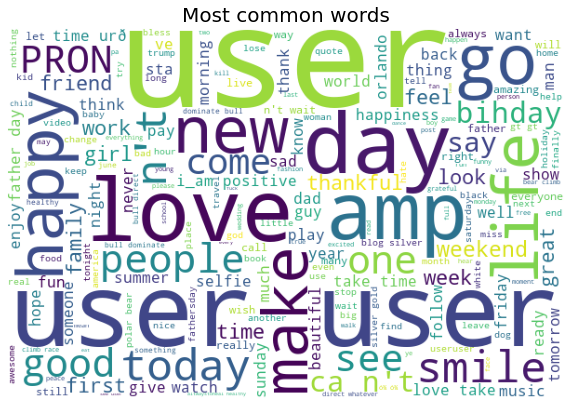

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))
wordcloud = WordCloud(background_color='white',
                            width=600,
                            height=400).generate(all_tweets) # it takes string as input
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title("Most common words", fontsize=20);

In [ ]:
hate_words = data.loc[data['label'] == 1]['cleaned_tweet'].str.cat()
hate_words

"like msian opposition claim bangladeshis vote bn evidence yet people believe anywayâ\x80 ¦great country australia israel australian opkillingbayã\x80\x80 seashepherd israeliã\x80\x80 kpop kpopdanceuser seem escape attention bash white n't win election 1200 dem seat lose 08-â\x80 ¦chick get fuck c thomas howell nakeuser agree hrc wouldnâ\x80\x99t popularvote without ca much way trump wouldnâ\x80\x99t win without â\x80 ¦girl world natt chanapa nu sex fucklate indigenous remote daily thank user user user justjusticeuser ' m constantly let lack fat male role model especially emojisseriously lede come user betterscapelliti woobietuesday be block troll promise blacklivesmatter amp â\x80 ¦user may libtard ... libtard sjw liberal politiccpcldr elxn42 user enable user mp 's make statement great alt - right work cpc cdnpoliuser feminismiscancer feminismisterrorism feminismmuktbharat malevote ignore userâ\x80 ¦ black amp feel like stomp listen retweet tampa miamiâ\x80 ¦hispanic amp feel like sto

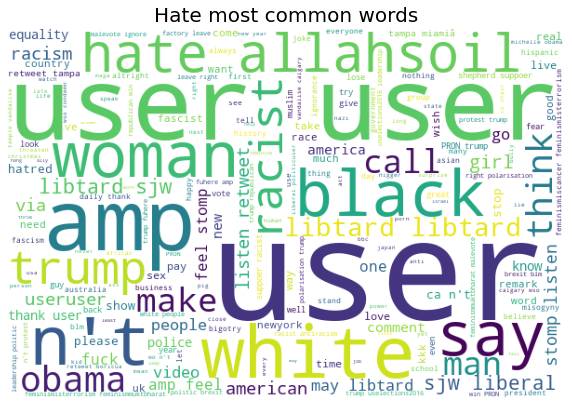

In [ ]:
hate_words = data.loc[data['label'] == 1]['cleaned_tweet'].str.cat()

fig, ax = plt.subplots(figsize = (10, 8))
wordcloud = WordCloud(background_color='white',
                            width=600,
                            height=400).generate(hate_words) # it takes string as input
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title("Hate most common words", fontsize=20);

# Additional Features

Let's add some extra features that might have an impact

In [ ]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [ ]:
data['punct%'] = data['tweet'].apply(lambda x: count_punct(x))


In [ ]:
data_test['punct%'] = data_test['tweet'].apply(lambda x: count_punct(x))

In [ ]:
data['text_len'] = data['tweet'].apply(lambda x: len(x) - x.count(" "))

In [ ]:
data_test['text_len'] = data_test['tweet'].apply(lambda x: len(x) - x.count(" "))

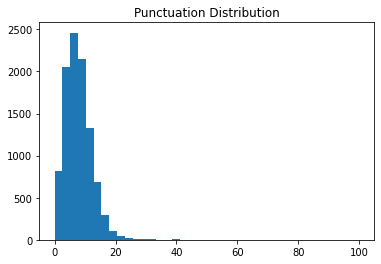

In [ ]:
bins = np.linspace(0, 100, 40)
plt.hist(data['punct%'], bins)
plt.title("Punctuation Distribution")
plt.show()

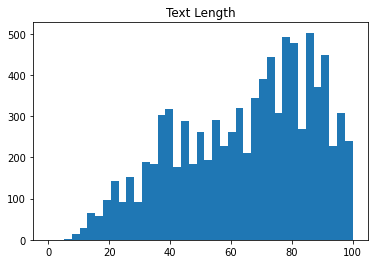

In [ ]:
bins = np.linspace(0, 100, 40)
plt.hist(data['text_len'], bins)
plt.title("Text Length")
plt.show()

In [ ]:
data.groupby('label').mean()

,id,punct%,text_len
label,,,
0,16009.956269,7.842806,68.868594
1,16069.933622,7.248196,75.984127


In [ ]:
data.shape

(10000, 6)

# Vectorizing using CountVectorizer & fitting to Logistic Regression model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_model= CountVectorizer()
bow_vec=bow_model.fit_transform(data.cleaned_tweet)
x_train=pd.DataFrame(bow_vec.toarray(), columns = bow_model.get_feature_names())
x_train['punct%']= data['punct%']
x_train['text_len'] = data['text_len']
x_train.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000001,001,01,0115,02,03,03111880779,039,...,ðºð¾ð,ðºð¾ñ,ð½ð,ð¾ð,ð¾ð½ð,ð¾ñ,ó¾,ø¹ù,punct%,text_len
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.7,91
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,96
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,38.5,26
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.8,88
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.3,91


In [ ]:
x_train.shape

(10000, 17825)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [ ]:
x_train.shape

(10000, 17825)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
y_train=data['label']
y_train = np.array(y_train)
y_train.shape

(10000,)

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
bow_vec_test=bow_model.transform(data_test.cleaned_tweet)
bow_data_test=pd.DataFrame(bow_vec_test.toarray(), columns = bow_model.get_feature_names())
bow_data_test['punct%']= data_test['punct%']
bow_data_test['text_len'] = data_test['text_len']
x_test= bow_data_test
x_test = scaler.fit_transform(x_test)
y_test =data_test['label']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#Applying the Model

In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
lr_prediction=lr.predict(x_test)
prediction_list = lr_prediction.tolist()
data_test['MyModel']=prediction_list
lr_precision,lr_recall,lr_fscore,lr_support = score(y_test,lr_prediction, average='binary')
print('Precision: {} / Recall: {} / F Score: {}'.format(round(lr_precision, 3),
                                                        round(lr_recall, 3), round(lr_fscore, 3)))

Precision: 0.655 / Recall: 0.361 / F Score: 0.465


In [ ]:
len(prediction_list)

5000

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, lr_prediction, labels=[0,1])
cf_matrix

array([[4581,   67],
       [ 225,  127]])

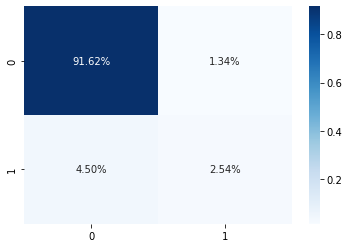

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
with open('/content/drive/MyDrive/Colab/Final Assignment/data_test.csv', 'w', encoding = 'utf-8-sig') as f:
  data_test.to_csv(f)

In [ ]:
data_test.head()

,id,label,tweet,cleaned_tweet,punct%,text_len,MyModel,processed,HuggingFace,Balanced
0,6054,0,@user a happy marriage is the union of two go...,user happy marriage union two good forgiver â...,5.3,75,0,@user a happy marriage is the union of two go...,0,0
1,6946,0,hey @user me and @user will see you @user in a...,hey user user see user august somethingtolookf...,11.4,70,0,hey @user me and @user will see you @user in a...,0,1
2,440,0,we'll back going to tacloban now! see ya later...,will back go tacloban see ya later ó¾µâ¤ gre...,4.3,92,0,we'll back going to tacloban now! see ya later...,0,0
3,9025,0,my #boyfriend hasn't come back home yet :( #cr...,boyfriend n't come back home yet crazyboyfrien...,12.8,78,0,my #boyfriend hasn't come back home yet :( #cr...,0,0
4,16995,0,i am thankful for clothes. #thankful #positive...,thankful clothe thankful positive,7.5,40,0,i am thankful for clothes. #thankful #positive...,0,0


# Balanced Classes

I want to see if balancing the classes of the input data would help the feature based model improve its results

In [ ]:
data_balanced = pd.read_csv('/content/drive/MyDrive/Colab/Final Assignment/train.csv',delimiter=',')
data.head()

,id,label,tweet,cleaned_tweet,punct%,text_len
0,12234,0,@user 78 days until we are here! countdown is...,user 78 day countdown user excite ðð¾ð¬...,7.7,91
1,30755,1,like msian opposition and their claim that ban...,like msian opposition claim bangladeshis vote ...,1.0,96
2,22175,0,@user so fkn excited!!!!!!!!!,user fkn excite,38.5,26
3,5052,0,solidarity with orlando ð #solidaritywithor...,solidarity orlando ð solidaritywithorlando ...,6.8,88
4,21884,0,finalizing the qubis design. a beautiful conce...,finalizing qubis design beautiful concept fina...,3.3,91


In [ ]:
data_balanced["label"].value_counts()

0    25072
1     1890
Name: label, dtype: int64

In [ ]:
data_balanced = data_balanced.groupby('label').sample(n = 1890)

In [ ]:
data_balanced["label"].value_counts()

0    1890
1    1890
Name: label, dtype: int64

In [ ]:
data_balanced.shape

(3780, 3)

In [ ]:
data_balanced['cleaned_tweet']=data_balanced['tweet'].apply(lambda row : clean_text(row, lemmatization, 'english'))
data.head()

,id,label,tweet,cleaned_tweet,punct%,text_len
0,12234,0,@user 78 days until we are here! countdown is...,user 78 day countdown user excite ðð¾ð¬...,7.7,91
1,30755,1,like msian opposition and their claim that ban...,like msian opposition claim bangladeshis vote ...,1.0,96
2,22175,0,@user so fkn excited!!!!!!!!!,user fkn excite,38.5,26
3,5052,0,solidarity with orlando ð #solidaritywithor...,solidarity orlando ð solidaritywithorlando ...,6.8,88
4,21884,0,finalizing the qubis design. a beautiful conce...,finalizing qubis design beautiful concept fina...,3.3,91


In [ ]:
data_balanced['punct%'] = data_balanced['tweet'].apply(lambda x: count_punct(x))


In [ ]:
data_balanced['text_len'] = data_balanced['tweet'].apply(lambda x: len(x) - x.count(" "))
data_balanced.head()

,id,label,tweet,cleaned_tweet,punct%,text_len
14663,5442,0,day for #ca &amp; #usa! ðmany people who ...,day ca amp usa ðmany people think want die ...,10.4,96
4108,12916,0,#flagday2016 #flag #day #2016 #(30 #photos) ...,flagday2016 flag day 2016 30 photo buy thing `...,15.9,69
9524,2414,0,just saw! i'm really happy you're gaining trac...,see ' m really happy be gain traction 's matte...,7.1,85
8739,1654,0,"illness,"" he asked. ð¾",illness '' ask ð¾,14.3,21
188,13145,0,#friends #mimarco #guillermosbday #goodtime #h...,friend mimarco guillermosbday goodtime happine...,9.9,71


In [ ]:
bow_vec=bow_model.fit_transform(data_balanced.cleaned_tweet)
x_train=pd.DataFrame(bow_vec.toarray(), columns = bow_model.get_feature_names())
x_train['punct%']= data['punct%']
x_train['text_len'] = data['text_len']
x_train.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0099,01,06,0618,08,10,100,1000,...,ï¼,ï½,ð²ñ,ð¹,ðºð,ðºð¾ñ,ó¾,ø¹ù,punct%,text_len
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.7,91
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,96
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,38.5,26
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.8,88
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.3,91


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [ ]:
y_train=data_balanced['label']
y_train = np.array(y_train)
y_train.shape

(3780,)

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
bow_vec_test=bow_model.transform(data_test.cleaned_tweet)
bow_data_test=pd.DataFrame(bow_vec_test.toarray(), columns = bow_model.get_feature_names())
bow_data_test['punct%']= data_test['punct%']
bow_data_test['text_len'] = data_test['text_len']
x_test= bow_data_test
x_test = scaler.fit_transform(x_test)
y_test =data_test['label']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lr_prediction=lr.predict(x_test)
prediction_list = lr_prediction.tolist()
data_test['Balanced']=prediction_list
lr_precision,lr_recall,lr_fscore,lr_support = score(y_test,lr_prediction, average='binary')
print('Precision: {} / Recall: {} / F Score: {}'.format(round(lr_precision, 3),
                                                        round(lr_recall, 3), round(lr_fscore, 3)))

Precision: 0.155 / Recall: 0.957 / F Score: 0.267


#Hugging Face Hate-Speech classifier

In [ ]:
!pip install transformers
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
from scipy.special import softmax
import csv
import urllib.request

In [ ]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [ ]:
data_test['processed']=data_test['tweet'].apply(lambda row : preprocess(row))

In [ ]:
task='hate'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/588 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

In [ ]:
print(labels)

['not-hate', 'hate']


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [ ]:
!pip install tqdm
from tqdm import tqdm
import time

In [ ]:
predictions = []
for row in tqdm(data_test['processed']):
  encoded_input = tokenizer(row, return_tensors='pt')
  output = model(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores = scores.tolist()
  if scores[0]>scores[1]:
    predictions.append(0)
  else: predictions.append(1)

100%|██████████| 5000/5000 [16:56<00:00,  4.92it/s]


In [ ]:
data_test['HuggingFace'] = predictions
data_test.head()

,id,label,tweet,cleaned_tweet,punct%,text_len,MyModel,processed,HuggingFace
0,6054,0,@user a happy marriage is the union of two go...,user happy marriage union two good forgiver â...,5.3,75,0,@user a happy marriage is the union of two go...,0
1,6946,0,hey @user me and @user will see you @user in a...,hey user user see user august somethingtolookf...,11.4,70,0,hey @user me and @user will see you @user in a...,0
2,440,0,we'll back going to tacloban now! see ya later...,will back go tacloban see ya later ó¾µâ¤ gre...,4.3,92,0,we'll back going to tacloban now! see ya later...,0
3,9025,0,my #boyfriend hasn't come back home yet :( #cr...,boyfriend n't come back home yet crazyboyfrien...,12.8,78,0,my #boyfriend hasn't come back home yet :( #cr...,0
4,16995,0,i am thankful for clothes. #thankful #positive...,thankful clothe thankful positive,7.5,40,0,i am thankful for clothes. #thankful #positive...,0


In [ ]:
hf_precision, hf_recall, hf_fscore, hf_support = score(data_test['label'], data_test['HuggingFace'], average = 'binary')

In [ ]:
print('Precision: {} / Recall: {} / F score: {}'.format(round(hf_precision, 3),
                                                        round(hf_recall, 3),
                                                        round(hf_fscore, 3)))

Precision: 0.296 / Recall: 0.045 / F score: 0.079


In [ ]:
hfcf_matrix = confusion_matrix(data_test['label'], data_test['HuggingFace'], labels=[0,1])
hfcf_matrix

array([[4610,   38],
       [ 336,   16]])

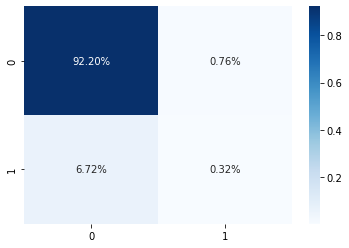

In [ ]:
sns.heatmap(hfcf_matrix/np.sum(hfcf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
data_test.head()

,id,label,tweet,cleaned_tweet,punct%,text_len,MyModel,processed,HuggingFace
0,6054,0,@user a happy marriage is the union of two go...,user happy marriage union two good forgiver â...,5.3,75,0,@user a happy marriage is the union of two go...,0
1,6946,0,hey @user me and @user will see you @user in a...,hey user user see user august somethingtolookf...,11.4,70,0,hey @user me and @user will see you @user in a...,0
2,440,0,we'll back going to tacloban now! see ya later...,will back go tacloban see ya later ó¾µâ¤ gre...,4.3,92,0,we'll back going to tacloban now! see ya later...,0
3,9025,0,my #boyfriend hasn't come back home yet :( #cr...,boyfriend n't come back home yet crazyboyfrien...,12.8,78,0,my #boyfriend hasn't come back home yet :( #cr...,0
4,16995,0,i am thankful for clothes. #thankful #positive...,thankful clothe thankful positive,7.5,40,0,i am thankful for clothes. #thankful #positive...,0


In [ ]:
with open('/content/drive/MyDrive/Colab/Final Assignment/data_test.csv', 'w') as f:
  data_test.to_csv(f)

# Sampling for Error Analysis

First I want to look at some false negatives

In [ ]:
data_test.loc[((data_test['label'] == 1) & (data_test['MyModel'] == 0)) | ((data_test['label'] == 1) & (data_test['HuggingFace'] == 0))].sample(20)

,id,label,tweet,cleaned_tweet,punct%,text_len,MyModel,processed,HuggingFace,Balanced
995,31197,1,@user #apparently #the #only #thing #you #dont...,user apparently thing do not hate asian parent...,15.5,103,0,@user #apparently #the #only #thing #you #dont...,0,1
2377,9639,1,@user council staff have been instructed by th...,user council staff instruct anc go slow make d...,3.1,98,0,@user council staff have been instructed by th...,0,1
1298,18316,1,@user you might be a libtard if... #libtard #...,user may libtard ... libtard sjw liberal politic,14.0,57,1,@user you might be a libtard if... #libtard #...,0,1
991,21655,1,@user hey! but the chinese are communists as w...,user hey chinese communist well oh be white 's...,8.9,101,1,@user hey! but the chinese are communists as w...,0,1
4010,21443,1,(advanced value chain videos at ) #valuechain,advanced value chain video valuechain,7.7,39,1,(advanced value chain videos at ) #valuechain,0,1
3179,27987,1,@user #feminismiscancer #feminismisterrorism #...,user feminismiscancer feminismisterrorism femi...,6.9,87,1,@user #feminismiscancer #feminismisterrorism #...,0,1
3247,26327,1,@user empowerment of by #trump is absolutely ...,user empowerment trump absolutely scary cud sl...,4.9,102,0,@user empowerment of by #trump is absolutely ...,0,1
899,29054,1,fair &amp; lovely effect...,fair amp lovely effect ...,20.8,24,0,fair &amp; lovely effect...,0,1
4787,9477,1,in ufc pay: amanda nunes (@user who was &amp;...,ufc pay amanda nunes user amp still champ whop...,8.1,99,0,in ufc pay: amanda nunes (@user who was &amp;...,0,1
3693,11479,1,crazed woman 'launched sick attack on muslim c...,crazed woman ' launch sick attack muslim cab d...,5.5,73,0,crazed woman 'launched sick attack on muslim c...,0,1


Then I'm pulling out false positives

In [ ]:
data_test.loc[((data_test['label'] == 0) & (data_test['MyModel'] == 1)) | ((data_test['label'] == 0) & (data_test['HuggingFace'] == 1))].sample(10)

,id,label,tweet,cleaned_tweet,punct%,text_len,MyModel,processed,HuggingFace,Balanced
3780,28159,0,@user the most girls trying to gang up on ame...,user girl try gang amerika would n't say shit ...,2.6,78,0,@user the most girls trying to gang up on ame...,1,0
2079,7364,0,@user yassss *finger clicks* she gonna be a fi...,user yassss * finger click * gon na fine ass b...,7.1,99,0,@user yassss *finger clicks* she gonna be a fi...,1,1
3735,21106,0,haha.. you can't #replace me.. no way &amp; #n...,haha .. ca n't replace -PRON- .. way amp never...,21.2,52,1,haha.. you can't #replace me.. no way &amp; #n...,0,1
1052,29357,0,the wife is so fucking psychotic as well. she ...,wife fucking psychotic well repo matter get 's...,3.9,102,0,the wife is so fucking psychotic as well. she ...,1,1
3989,31942,0,passed first year of uni #yay #love #pass #uni...,pass first year uni yay love pass unistudent p...,9.2,76,1,passed first year of uni #yay #love #pass #uni...,0,1
1651,4269,0,"stfu bitch , if u have anything against me or ...",stfu bitch u anything wan na talk shit come fu...,3.4,89,0,"stfu bitch , if u have anything against me or ...",1,1
1243,29102,0,@user it's a serious problem. even salvadoran...,user 's serious problem even salvadoran sposca...,2.9,105,1,@user it's a serious problem. even salvadoran...,0,1
4632,4919,0,"@user welfare mom, shop lifter &amp; #trump m...",user welfare mom shop lifter amp trump mouthpi...,9.8,102,1,"@user welfare mom, shop lifter &amp; #trump m...",1,1
163,10521,0,@user haha i'm at a vacation but it's about to...,user haha ' m vacation 's end ð£,6.8,44,1,@user haha i'm at a vacation but it's about to...,0,1
4304,20089,0,"#fact ~~&gt; #girls #ignore nice #guys, chas...",fact ~~ gt girl ignore nice guy chase asshole ...,16.7,72,0,"#fact ~~&gt; #girls #ignore nice #guys, chas...",1,1


# Comments

Both classifiers have classified the overwhelming majority of the data as 'not-hate speech', which is not surprising considering the unbalanced nature of the data. What I am surprised by here is that the feature based classifier performed better than the Hugging Face model which was specifically trained for hate speech recognition. There are a few possibilities for why that is, but first I will look at the feature based model. 

--------------------------------------------------------------------------------------------------------------------

I was unable to vectorize the full dataset without running out of RAM, so had to use the reduced sized dataset to train on. This may have impacted the results of the model as out of 10000 examples it received only 693 examples of hate speech to train on, with over 9000 examples of non-hate speech. This is a real-world problem and I tried balancing the classes by sampling all hate speech examples and an equal number of non-hate speech from the full dataset. However, the results for that model were worse, which I suspect is because the training set at 3780 was just too small for the training. It's noticeable though that the balanced dataset classifies sentences overwhelmingly as hate-speech, in direct opposition to the classifier trained on the full model.

Even using the smaller dataset I was not able to use TfidfVectorizer as that also used all available RAM and crashed Colab. CountVectorizer got around that problem. I also encountered a problem which I don't (yet) fully understand when I added in the additional features (punctuation and tweet length), which was that I could no longer fit the training data to the model - I received a 'does not converge' error and had to use the scaler to solve it. 

--------------------------------------------------------------------------------------------------------------------

The Hugging Face dataset produced surprisingly poor results for a model designed for this purpose. Finetuning it on the dataset would presumably improve the results (I looked into doing that but it said it would take 15 hours and I didn't have the time!). As this is a pre-trained model it is difficult to look under the hood at reasons for the poor results, but looking at the samples I have extracted gives some insight. 

There are several tweets such as '(advanced value chain videos at ) #valuechain' and '	@user council staff have been instructed by the anc to go slow and make the da look bad. this was exposed a few weeks ago.' which it is hard for me to recognise as hate speech. (That second one is about South African politics, and to me it sounds biased and possibly racially motivated but is not overtly hate speech). Tweets which are ambiguous to a human annotator must be equally difficult for models, and looking at the dataset I found relatively high quantities of labels which I was unsure of. Fine-tuning would help the model to learn the specificities of this dataset. 

Looking at the false positives, i.e. those classed as hate-speech by the models but not in the dataset, it also raises the issue of how a model can distinguish between violent and abusive language motivated by racial or gender based hatred as opposed to 'regular' abuse as in the case of '@user welfare mom, shop lifter &amp; #trump mouthpiece @user must be the most self-loathing woman of color, ever. #saâ¦'

